In [3]:
!unzip -q "/content/archive (19).zip" -d dataset


[/content/archive (19).zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/archive (19).zip or
        /content/archive (19).zip.zip, and cannot find /content/archive (19).zip.ZIP, period.


In [2]:
!unzip /content/pollen_grains.zip -d dataset

Archive:  /content/pollen_grains.zip
error [/content/pollen_grains.zip]:  missing 23068672 bytes in zipfile
  (attempting to process anyway)
error: invalid zip file with overlapped components (possible zip bomb)


In [5]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2


In [6]:
path =  '/content/dataset'
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)] #list of all first names from list of all files
classes = Counter(names)  #returns dictionary with key as name, count as value

print("Total number of images is {}".format(len(names)))

Total number of images is 790


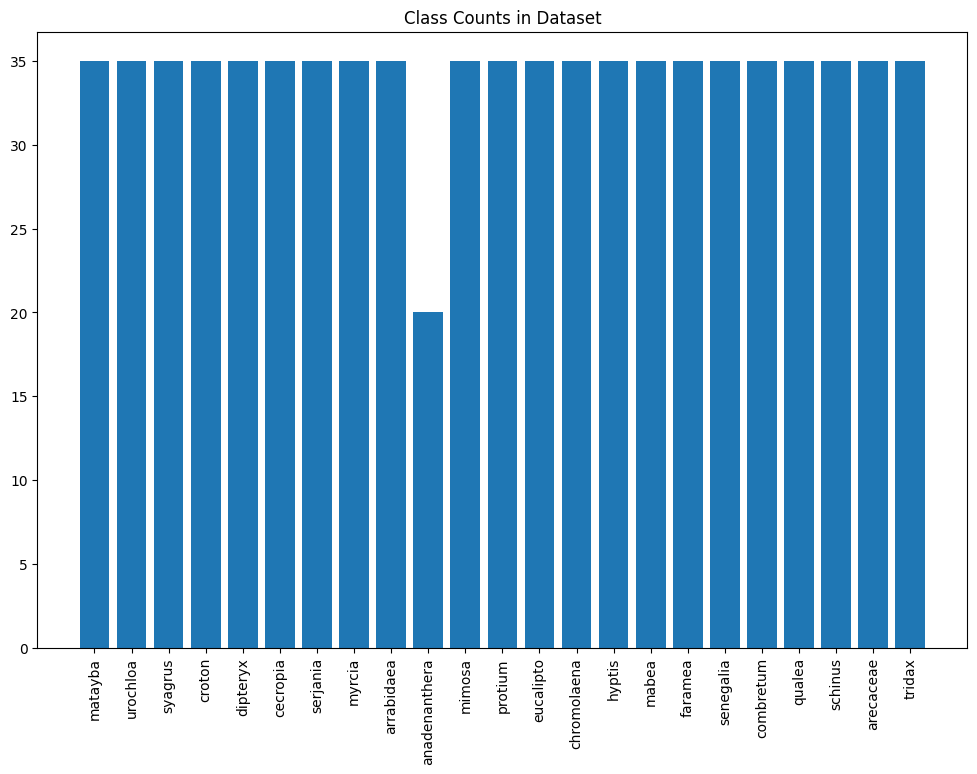

Counter({'matayba': 35, 'urochloa': 35, 'syagrus': 35, 'croton': 35, 'dipteryx': 35, 'cecropia': 35, 'serjania': 35, 'myrcia': 35, 'arrabidaea': 35, 'mimosa': 35, 'protium': 35, 'eucalipto': 35, 'chromolaena': 35, 'hyptis': 35, 'mabea': 35, 'faramea': 35, 'senegalia': 35, 'combretum': 35, 'qualea': 35, 'schinus': 35, 'arecaceae': 35, 'tridax': 35, 'anadenanthera': 20})


In [7]:
#bar graph of entire dataset
plt.figure(figsize = (12,8))
plt.title('Class Counts in Dataset')
plt.bar(*zip(*classes.items()))
plt.xticks(rotation='vertical')
plt.show()

print(classes)

In [8]:
path_class  = {key:[] for key in classes.keys()} #dict of class and path to come
for name in os.listdir(path):
    key = name.replace(' ', '_').split('_')[0] #assigning each key the path
    path_class[key].append(path + '/' + name) #adding the path into a list which is the value of all images of the species
print(path_class) #comment this to stop printing the dataset image path


{'matayba': ['/content/dataset/matayba_08.jpg', '/content/dataset/matayba_03.jpg', '/content/dataset/matayba_04.jpg', '/content/dataset/matayba_01.jpg', '/content/dataset/matayba_05.jpg', '/content/dataset/matayba_15.jpg', '/content/dataset/matayba_21.jpg', '/content/dataset/matayba_25.jpg', '/content/dataset/matayba_17.jpg', '/content/dataset/matayba_19.jpg', '/content/dataset/matayba_11.jpg', '/content/dataset/matayba_28.jpg', '/content/dataset/matayba_35.jpg', '/content/dataset/matayba_29.jpg', '/content/dataset/matayba_26.jpg', '/content/dataset/matayba_27.jpg', '/content/dataset/matayba_06.jpg', '/content/dataset/matayba_12.jpg', '/content/dataset/matayba_24.jpg', '/content/dataset/matayba_34.jpg', '/content/dataset/matayba_22.jpg', '/content/dataset/matayba_14.jpg', '/content/dataset/matayba_32.jpg', '/content/dataset/matayba_18.jpg', '/content/dataset/matayba_30.jpg', '/content/dataset/matayba_02.jpg', '/content/dataset/matayba_10.jpg', '/content/dataset/matayba_31.jpg', '/conte

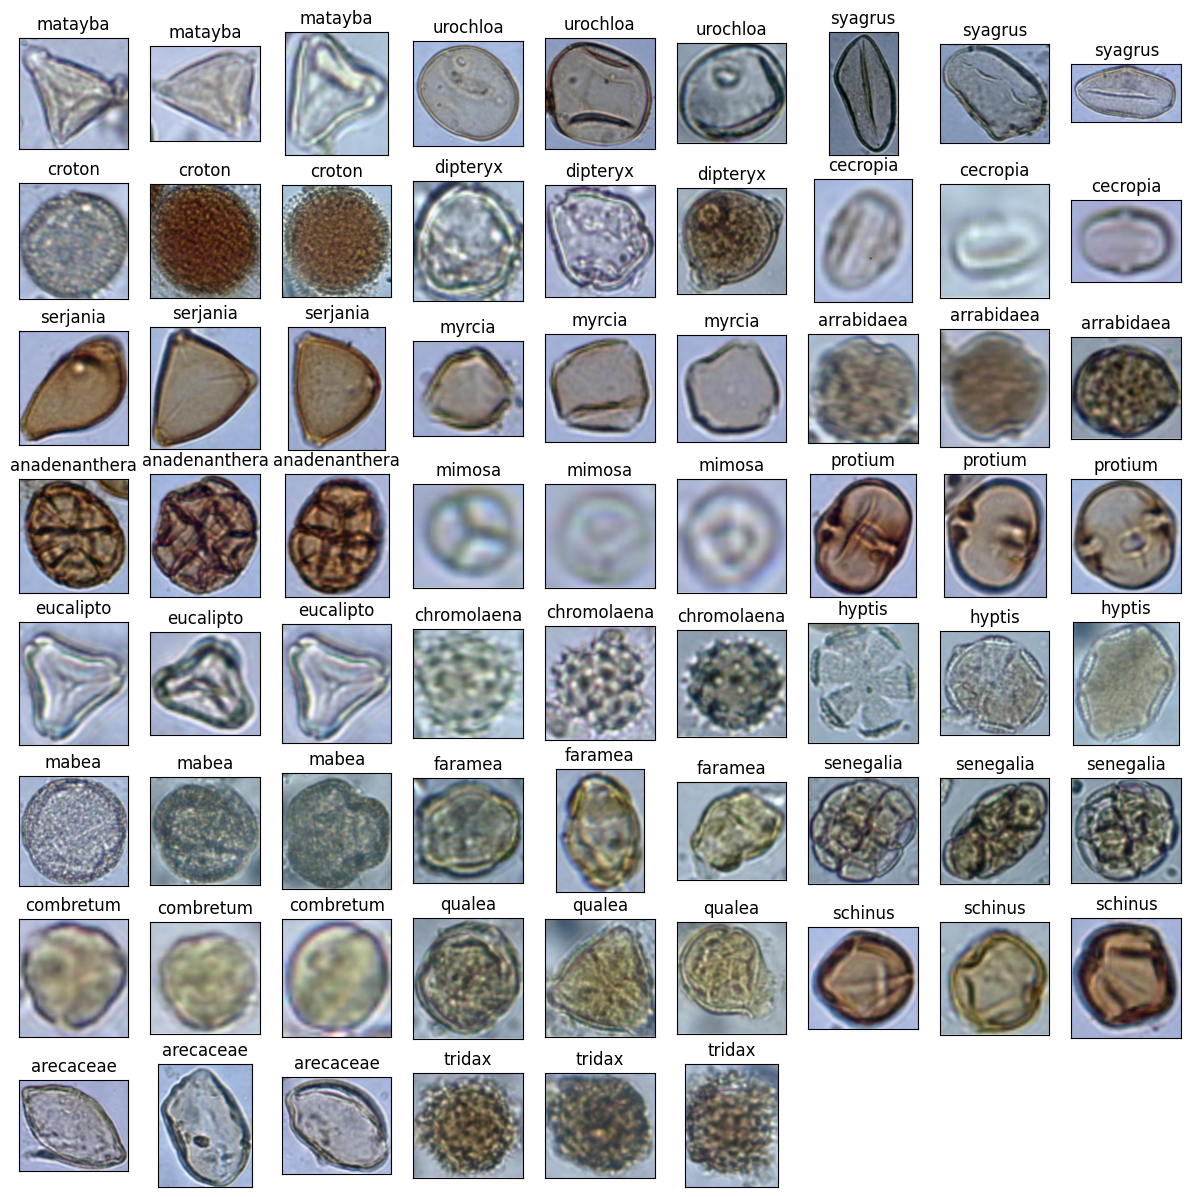

In [9]:
#images in the dataset
fig = plt.figure(figsize=(15, 15))
for i, key in enumerate(path_class.keys()):
    img1 = Image.open(path_class[key][0]) #opens first three images of each class
    img2 = Image.open(path_class[key][1])
    img3 = Image.open(path_class[key][2])

    ax = fig.add_subplot(8, 9,  3*i + 1, xticks=[], yticks=[])
    ax.imshow(img1)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9,  3*i + 2, xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9,  3*i + 3, xticks=[], yticks=[])
    ax.imshow(img3)
    ax.set_title(key)
plt.show()


In [10]:
#choose a class for classifying
list_of_pollens=['anadenanthera', 'urochloa', 'arrabidaea', 'cecropia',
                 'chromolaena', 'combretum', 'croton', 'dipteryx',
                 'eucalipto', 'qualea', 'hyptis', 'mabea',
                 'matayba', 'mimosa', 'myrcia', 'protium',
                 'faramea', 'schinus', 'senegalia', 'serjania',
                 'syagrus', 'tridax', 'arecaceae']
print('\n\n\n\n\n\n\n\n\n\n',list_of_pollens)
image_import=input("Enter image name from the given list: ")











 ['anadenanthera', 'urochloa', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'qualea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'faramea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'arecaceae']
Enter image name from the given list: mimosa


In [11]:
#Preprocessing`

def process_img(img, size = (128,128)):
    img = cv2.resize(img, size)  # resize image
    img = img/255                   # divide values by 255
    return img

In [12]:
X, Y = [], []     #x list of processed images, y list of class of that image
for name  in os.listdir(path):   #apply resize to all images
    img = cv2.imread(path + '/' + name)
    X.append(process_img(img))
    Y.append(name.replace(' ', '_').split('_')[0])

X = np.array(X)

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
Y_le = le.fit_transform(Y)
Y_cat = to_categorical(Y_le, 23)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_cat, test_size=0.285, stratify=Y_le)
print("Images in each class in Test set: {}".format(np.sum(Y_test, axis =0)))


Images in each class in Test set: [ 6. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [32]:
#Model

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the base model (InceptionV3 without the top classification layer)
# Use the input shape that matches your processed images (128, 128, 3)
base_model = InceptionV3(weights=None, include_top=False, input_shape=(128, 128, 3))

# Load the pre-trained weights (ensure the file path is correct)
weights_path = "/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
try:
    base_model.load_weights(weights_path)
    print(f"Weights loaded successfully from {weights_path}")

    # Add your own classification layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add a dense layer with a number of units equal to your number of classes (23)
    predictions = Dense(len(classes), activation='softmax')(x) # Use the 'classes' variable from earlier

    # This is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    model.summary()

    # Compile the model (you'll need to compile before evaluating or training)
    # Choose an optimizer, loss function, and metrics suitable for your task
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


    # Now you can evaluate the model (though it's not trained on your data yet)
    # score = model.evaluate(X_test, Y_test, verbose=0)
    # print('Test set accuracy: {}'.format(score[1]))

except FileNotFoundError:
    print(f"Error: Weights file not found at {weights_path}")
except Exception as e:
    print(f"Error loading weights or building model: {e}")

Weights loaded successfully from /inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 63, 63,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 63, 63,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 61, 61,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 30, 30,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 30, 30,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 21,849,911 (83.35 MB)

 Trainable params: 21,815,479 (83.22 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [33]:
#Prediction


import random
random_species = image_import
print(random_species)
random_jpg=random.randint(0,len(path_class.values())) #the images are picked at random from the given class
img_test = Image.open(path_class[random_species][random_jpg])
print(path_class[random_species][random_jpg])


img_test.show()

mimosa
/content/dataset/mimosa_32.jpg


In [34]:
l=list(path_class.keys())
print(path_class.keys())

img_in = cv2.imread(path_class[random_species][random_jpg])
img_in = cv2.resize(img_in, (128,128))/255

print(img_in.shape)
img_in_correctdim = np.expand_dims(img_in, axis=0)
arr=model.predict(img_in_correctdim)
print(arr)


dict_keys(['matayba', 'urochloa', 'syagrus', 'croton', 'dipteryx', 'cecropia', 'serjania', 'myrcia', 'arrabidaea', 'anadenanthera', 'mimosa', 'protium', 'eucalipto', 'chromolaena', 'hyptis', 'mabea', 'faramea', 'senegalia', 'combretum', 'qualea', 'schinus', 'arecaceae', 'tridax'])
(128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[0.20101789 0.00654473 0.24167606 0.01847514 0.0080121  0.08180903
  0.00522955 0.0313959  0.07763434 0.01790429 0.01126691 0.00981399
  0.02643597 0.00605955 0.02233592 0.0291974  0.10173523 0.01239389
  0.00383238 0.01097193 0.00101204 0.05111345 0.02413227]]


In [35]:
list_of_pollens=['anadenanthera', 'urochloa', 'arrabidaea', 'cecropia',
                 'chromolaena', 'combretum', 'croton', 'dipteryx',
                 'eucalipto', 'qualea', 'hyptis', 'mabea',
                 'matayba', 'mimosa', 'myrcia', 'protium',
                 'faramea', 'schinus', 'senegalia', 'serjania',
                 'syagrus', 'tridax', 'arecaceae']

print(round(np.amax(arr)*100,2),"%","\t",end='')
result = np.where(arr==np.amax(arr))
indx=result[1][0]
print(list_of_pollens[indx])

24.17 % 	arrabidaea


In [37]:
#print(result)



firstmax = 0
secmax = 0
thirdmax = 0
findx,sindx,tindx=0,0,0

for i in range(len(arr[0])):

        # Check if current element
        # is less than firstmin,
        # then update first,second
        # and third

  if np.any(arr[0][i] > firstmax):
    thirdmax = secmax
    secmax = firstmax
    firstmax = arr[0][i]
    findx=i

        # Check if current element is
        # less than secmin then update
        # second and third
  elif np.any(arr[0][i] > secmax):
    thirdmax = secmax
    secmax = arr[0][i]
    sindx=i

        # Check if current element is
        # less than,then upadte third
  elif np.any(arr[0][i] > thirdmax):
    thirdmax = arr[0][i]
    tindx=i


print("First maximum = ", firstmax*100,"%","\t",list_of_pollens[findx])
print("Second maximum = ", secmax*100,"%","\t",list_of_pollens[sindx])
print("Third maximum = ", thirdmax*100,"%","\t",list_of_pollens[tindx])



First maximum =  24.167606 % 	 arrabidaea
Second maximum =  20.10179 % 	 urochloa
Third maximum =  10.173523 % 	 faramea
